In [3]:
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

-Cargar y preprocesar. 
-Uso de datos fidedignos.


In [4]:
data_bank = pd.read_csv("/Users/natalio/Desktop/Challenge RD/DataScience/bank-additional-full.csv", delimiter=';')

# Drop 'duration' column
data_bank = data_bank.drop('duration', axis=1)

# print(data_bank.info())
print('Shape of dataframe:', data_bank.shape)
data_bank.head()

Shape of dataframe: (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data_bank['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [6]:
#Distribución de datos entré "yes" or "no".
data_bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Data Balance
Check data is balance or not i.e Total % of Yes/No category

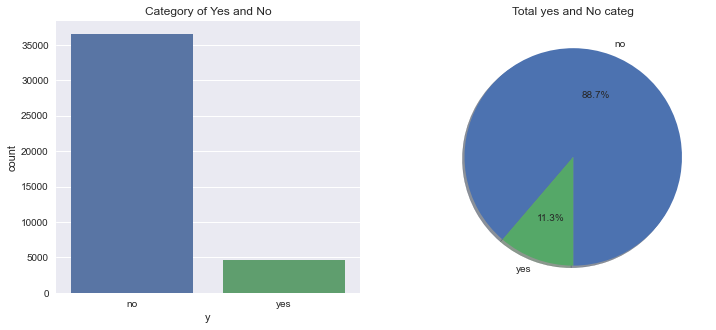

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=data_bank)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =data_bank['y'].value_counts(sort = True).index
sizes = data_bank['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

In [7]:
#Valores faltantes
print(data_bank.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
data_bank_ready = data_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'campaign', 'pdays', 'previous']
data_bank_ready[num_cols] = scaler.fit_transform(data_bank_ready[num_cols])

data_bank_ready.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,-0.565922,0.195414,-0.349494,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education','day_of_week','default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(data_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = data_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['y'] = df_bank_ready['y'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head()

Shape of dataframe: (41188, 63)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.533034,-0.565922,0.195414,-0.349494,1.1,93.994,-36.4,4.857,5191.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.628993,-0.565922,0.195414,-0.349494,1.1,93.994,-36.4,4.857,5191.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.290186,-0.565922,0.195414,-0.349494,1.1,93.994,-36.4,4.857,5191.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002309,-0.565922,0.195414,-0.349494,1.1,93.994,-36.4,4.857,5191.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.533034,-0.565922,0.195414,-0.349494,1.1,93.994,-36.4,4.857,5191.0,0


Count Plot

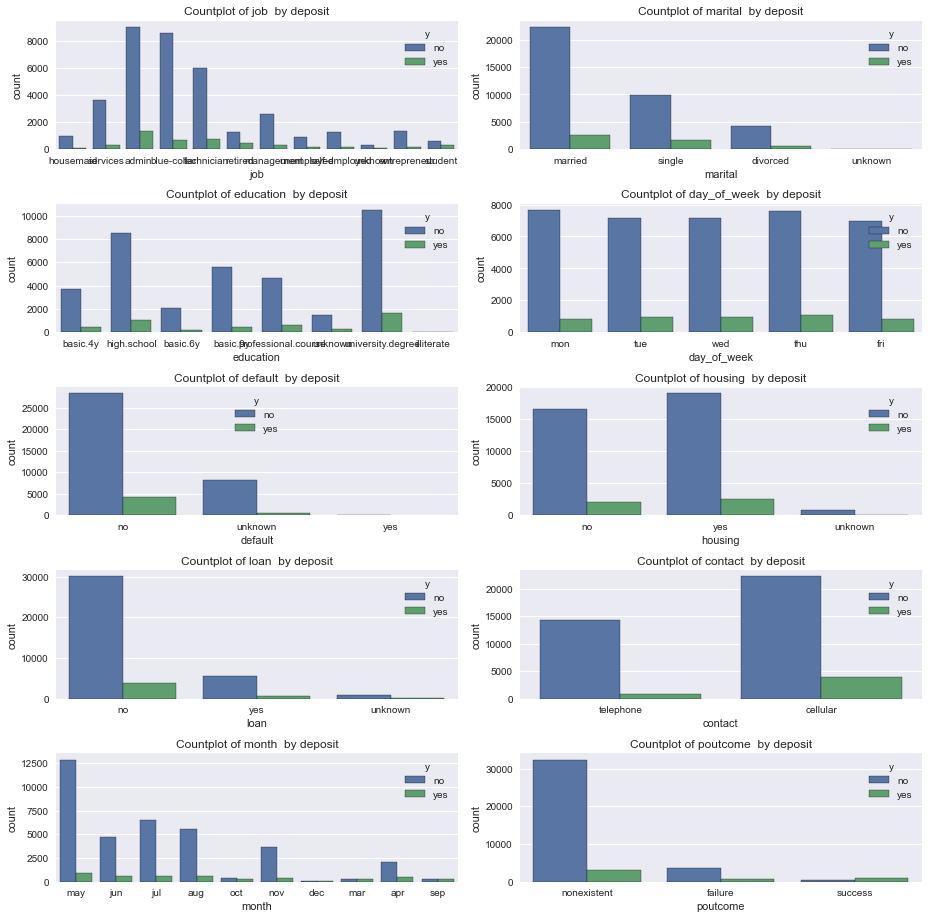

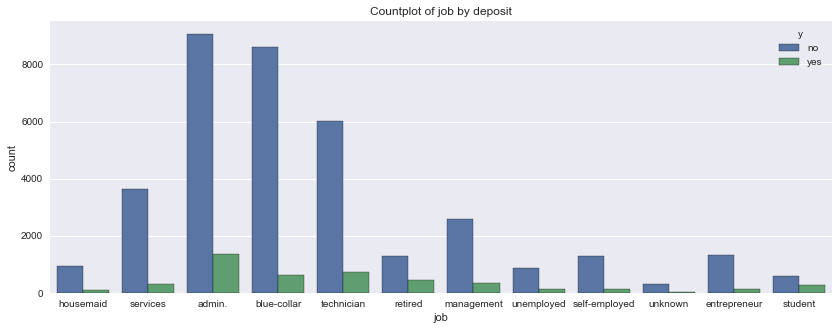

In [46]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(cat_cols):
    plt.subplot(6,2,i+1)
    sns.countplot(x=cat_fea,hue='y',data=data_bank,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='y',edgecolor="black",data=data_bank)
plt.title("Countplot of job by deposit")
plt.show()

In [10]:
# Select Features
feature = df_bank_ready.drop('y', axis=1)

# Select Target
target = df_bank_ready['y']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (32950, 62)
Shape of testing feature: (8238, 62)
Shape of training label: (32950,)
Shape of training label: (8238,)


In [11]:
from sklearn import metrics

In [12]:
def evaluate_model(model, X_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

In [13]:
X_test.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.769980,-0.565922,0.195414,-0.349494,-1.8,92.893,-46.2,1.244,5099.1
13950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.674021,-0.204909,0.195414,-0.349494,1.4,93.918,-42.7,4.963,5228.1
29451,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.441693,0.878132,0.195414,-0.349494,-1.8,93.075,-47.1,1.405,5099.1
32295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.578062,-0.565922,0.195414,-0.349494,-1.8,92.893,-46.2,1.313,5099.1
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.245157,1.600159,0.195414,-0.349494,-0.1,93.200,-42.0,4.021,5195.8


In [14]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Building Model

In [15]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best",max_depth=5,min_samples_split=5,min_samples_leaf=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=0)

Model Evaluation    

In [16]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc']*100)
print('Precision:', dtc_eval['prec']*100)
print('Recall:', dtc_eval['rec']*100)
print('F1 Score:', dtc_eval['f1']*100)
print('Cohens Kappa Score:', dtc_eval['kappa']*100)
print('Area Under Curve:', dtc_eval['auc']*100)
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 89.94901675163874
Precision: 64.5
Recall: 27.33050847457627
F1 Score: 38.392857142857146
Cohens Kappa Score: 33.8830971848286
Area Under Curve: 78.57223460889608
Confusion Matrix:
 [[7152  142]
 [ 686  258]]


RANDOM FOREST


Building Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0,n_estimators=10,criterion ="entropy",max_depth=5,min_samples_split=5,min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=10, random_state=0)

Model Evaluation

In [18]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc']*100)
print('Precision:', rf_eval['prec']*100)
print('Recall:', rf_eval['rec']*100)
print('F1 Score:', rf_eval['f1']*100)
print('Cohens Kappa Score:', rf_eval['kappa']*100)
print('Area Under Curve:', rf_eval['auc']*100)
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 89.75479485311969
Precision: 71.9298245614035
Recall: 17.372881355932204
F1 Score: 27.986348122866893
Cohens Kappa Score: 24.625799720569375
Area Under Curve: 80.1860160196679
Confusion Matrix:
 [[7230   64]
 [ 780  164]]


Naive Bayes

Building Model

In [19]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Model Evaluation

In [20]:
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc']*100)
print('Precision:', nb_eval['prec']*100)
print('Recall:', nb_eval['rec']*100)
print('F1 Score:', nb_eval['f1']*100)
print('Cohens Kappa Score:', nb_eval['kappa']*100)
print('Area Under Curve:', nb_eval['auc']*100)
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 84.83855304685603
Precision: 37.67178658043654
Recall: 49.36440677966102
F1 Score: 42.7326914259514
Cohens Kappa Score: 34.176619675168716
Area Under Curve: 77.8156268444461
Confusion Matrix:
 [[6523  771]
 [ 478  466]]


K-Nearest Neighbors

Building Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='ball_tree', metric='minkowski',p = 2) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [22]:
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc']*100)
print('Precision:', knn_eval['prec']*100)
print('Recall:', knn_eval['rec']*100)
print('F1 Score:', knn_eval['f1']*100)
print('Cohens Kappa Score:', knn_eval['kappa']*100)
print('Area Under Curve:', knn_eval['auc']*100)
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 88.3709638261714
Precision: 48.85245901639344
Recall: 31.56779661016949
F1 Score: 38.35263835263835
Cohens Kappa Score: 32.25847652721351
Area Under Curve: 72.36793911178448
Confusion Matrix:
 [[6982  312]
 [ 646  298]]


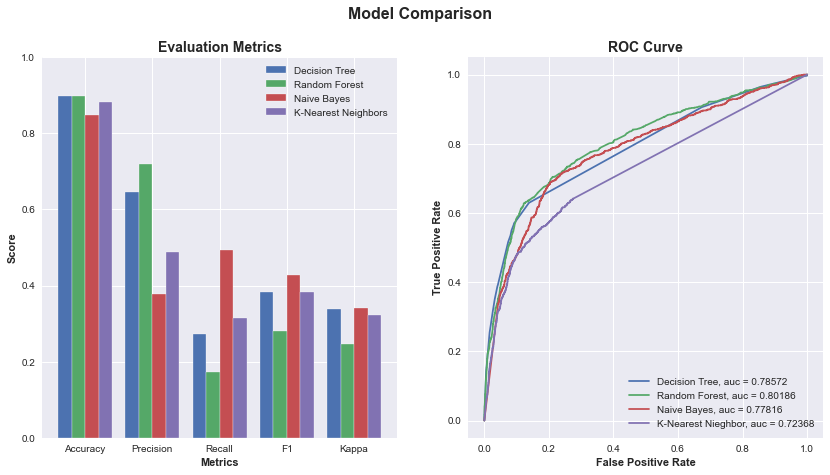

In [23]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

In [28]:
accuracies = cross_val_score(dtc, X=X_train, y=y_train, cv=10) 
print('Accuracy DFC:', accuracies.mean())
accuraciesrf = cross_val_score(rf, X=X_train, y=y_train, cv=10)
print ('Accuracy RF:',  accuraciesrf.mean())
accuraciesnb = cross_val_score(nb, X=X_train, y=y_train, cv=10) 
print ('Accuracy NB:', accuraciesnb.mean())
accuracieknn = cross_val_score(knn, X=X_train, y=y_train, cv=10)
print ('Accuracy KNN:', accuracieknn.mean())


Accuracy DFC: 0.90103186646434
Accuracy RF: 0.8998786039453719
Accuracy NB: 0.8489226100151746
Accuracy KNN: 0.8827010622154781


In [39]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=2,n_estimators = 100,criterion='gini',max_depth=100,max_features=4,min_samples_leaf=3,min_samples_split=8,oob_score=True)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='accuracy',
                           cv=5, n_jobs=-1, verbose=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 32.5min finished


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

Evaluating Optimised Model

In [40]:
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc']*100)
print('Precision:', best_grid_eval['prec']*100)
print('Recall:', best_grid_eval['rec']*100)
print('F1 Score:', best_grid_eval['f1']*100)
print('Cohens Kappa Score:', best_grid_eval['kappa']*100)
print('Area Under Curve:', best_grid_eval['auc']*100)
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 89.97329448895363
Precision: 67.2514619883041
Recall: 24.364406779661017
F1 Score: 35.769828926905134
Cohens Kappa Score: 31.600989589050354
Area Under Curve: 79.59785556273324
Confusion Matrix:
 [[7182  112]
 [ 714  230]]


Model Comparison(Original vs. Optimized)

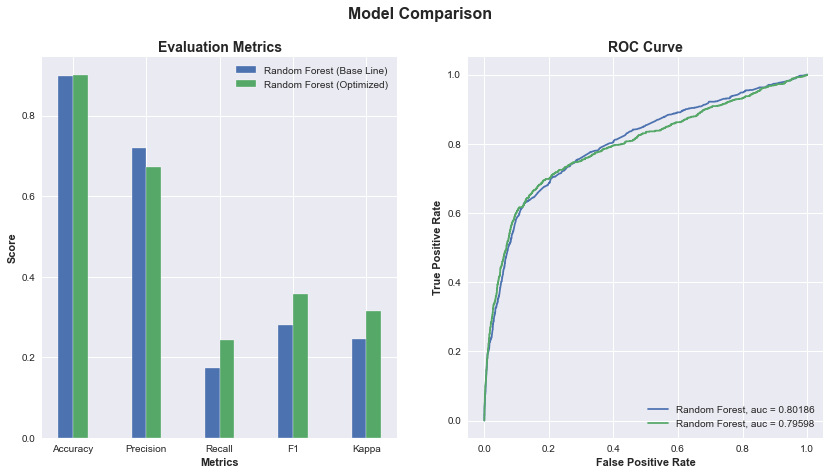

Change of 0.24% on accuracy.
Change of -6.50% on precision.
Change of 40.24% on recall.
Change of 27.81% on F1 score.
Change of 28.32% on Kappa score.
Change of -0.73% on AUC.


In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

Output

In [42]:
data_bank['deposit_prediction'] = rf.predict(feature)
data_bank['deposit_prediction'] = data_bank['deposit_prediction'].apply(lambda x: 'yes' if x==0 else 'no')

# Save new dataframe into csv file
data_bank.to_csv('deposit_prediction.csv', index=False)

data_bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,deposit_prediction
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,yes


## Saving model


In [43]:
from joblib import dump, load

# Saving model
dump(rf, 'bank_deposit_classification.joblib')
# Loading model
# clf = load('bank_deposit_classification.joblib')

['bank_deposit_classification.joblib']